# Question: 
### Analyze the micromobility data set from MDS and provide some findings and recommendations for the business

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.reset_option('display.float_format')

#### All data obtained from [data.austintexas.gov](https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r)  
#### Data consist of all micromobility vehicle trips from May'18

In [3]:
# read in data
file_path='Shared_Micromobility_Vehicle_Trips.csv'
# data_types={
#     'ID': str, 
#     'Device ID': str, 
#     'Vehicle Type': str, 
#     'Trip Duration': np.int64, 
#     'Trip Distance': np.float64, 
#     'Start Time': str, 
#     'End Time': str, 
#     'Modified Date': str, 
#     'Month': np.int32, 
#     'Hour': np.int32, 
#     'Day of Week': np.int32, 
#     'Council District (Start)': np.int64, 
#     'Council District (End)': np.int64, 
#     'Year': np.int32, 
#     'Census Tract Start': np.int64, 
#     'Census Tract End': np.int64
# }
# df=pd.read_csv(file_path, dtype=data_types)
df=pd.read_csv(file_path)

In [65]:
df['Census Tract Start']=df['Census Tract Start'].astype('str')

In [4]:
print(df.shape)
df.head()

(9403555, 16)


,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
0,1d4f113d-71b2-4213-9170-1644e048d4a1,d4d91f54-5527-4bef-9ce8-24808fbfadc3,scooter,420,869.00,04/10/2018 08:00:00 PM,04/10/2018 08:00:00 PM,04/17/2019 01:58:49 AM,4,20,2,9,9,2018,48453001100,48453001100
1,05d3d08f-9960-48e3-82f6-79a375ee28b0,4f62c903-e21b-499f-9197-fd0498f25cc5,scooter,371,1037.00,04/10/2018 07:45:00 PM,04/10/2018 08:00:00 PM,04/17/2019 01:58:49 AM,4,19,2,9,9,2018,48453000603,48453000601
2,61a4992e-7dff-4142-8dd6-baa23acf561a,6a25bdcf-1f68-4778-95b4-4223c7beec15,scooter,1687,4491.00,04/23/2018 01:15:00 PM,04/23/2018 01:45:00 PM,04/17/2019 02:42:15 AM,4,13,1,9,9,2018,48453001100,48453001100
3,f1410b76-327b-479c-825e-45168034f390,b6efa85b-a836-4412-9620-77609f0e612b,scooter,524,633.00,04/27/2018 09:45:00 PM,04/27/2018 10:00:00 PM,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000603,48453000604
4,61250373-bece-46c2-a7c6-fb91c53eeefe,7af82887-fe34-4327-a63a-dfd11646252f,scooter,322,1114.00,04/27/2018 09:45:00 PM,04/27/2018 09:45:00 PM,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000500,48453000601


#### Limit data to only scooters

In [57]:
scooter=df[df['Vehicle Type']=='scooter']
scooter['Start Time']=pd.to_datetime(scooter['Start Time'])
scooter['End Time']=pd.to_datetime(scooter['End Time'])
scooter['Velocity']=scooter['Trip Distance']/scooter['Trip Duration']
scooter.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Velocity
0,1d4f113d-71b2-4213-9170-1644e048d4a1,d4d91f54-5527-4bef-9ce8-24808fbfadc3,scooter,420,869.00,2018-04-10 20:00:00,2018-04-10 20:00:00,04/17/2019 01:58:49 AM,4,20,2,9,9,2018,48453001100,48453001100,2.07
1,05d3d08f-9960-48e3-82f6-79a375ee28b0,4f62c903-e21b-499f-9197-fd0498f25cc5,scooter,371,1037.00,2018-04-10 19:45:00,2018-04-10 20:00:00,04/17/2019 01:58:49 AM,4,19,2,9,9,2018,48453000603,48453000601,2.80
2,61a4992e-7dff-4142-8dd6-baa23acf561a,6a25bdcf-1f68-4778-95b4-4223c7beec15,scooter,1687,4491.00,2018-04-23 13:15:00,2018-04-23 13:45:00,04/17/2019 02:42:15 AM,4,13,1,9,9,2018,48453001100,48453001100,2.66
3,f1410b76-327b-479c-825e-45168034f390,b6efa85b-a836-4412-9620-77609f0e612b,scooter,524,633.00,2018-04-27 21:45:00,2018-04-27 22:00:00,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000603,48453000604,1.21
4,61250373-bece-46c2-a7c6-fb91c53eeefe,7af82887-fe34-4327-a63a-dfd11646252f,scooter,322,1114.00,2018-04-27 21:45:00,2018-04-27 21:45:00,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000500,48453000601,3.46


In [6]:
scooter.describe()

,Trip Duration,Trip Distance,Month,Hour,Day of Week,Year,Velocity
count,8954289.00,8954289.00,8954289.00,8954289.00,8954289.00,8954289.00,8953567.00
mean,656.41,43032.51,6.71,14.48,3.27,2018.87,inf
std,5287.54,5743274.68,3.37,5.40,2.11,0.59,nan
min,-3423.00,-16724106.00,1.00,0.00,0.00,2018.00,-196290.46
25%,230.00,470.00,4.00,12.00,1.00,2019.00,1.40
50%,397.00,1002.00,7.00,15.00,4.00,2019.00,2.39
75%,734.00,1864.44,10.00,18.00,5.00,2019.00,3.44
max,5330845.00,2147479547.00,12.00,23.00,6.00,2020.00,inf


**How to treat DQ issues**
* Fill missing values
* Normalize/Standardize
* Cap at a maximum for outliers

**Observations**  
* Extreme variance/outliers on Trip Distance and Trip Duration
* No Missing values
* Data issues related to negative values in Trip Distance and Trip Duration
![warning](images/image_1.png)

#### Apply filter

In [58]:
dq_filter=(scooter['Trip Distance'].between(5280*.1, 5280*500, inclusive=False)) & (scooter['Trip Duration']<24*60*60)
print(f'Number of Clean Records: {dq_filter.sum()} / {len(scooter)}')
clean_data=scooter[dq_filter]

Number of Clean Records: 6466776 / 8954289


## Exploratory Data Analysis

#### Usage over Time

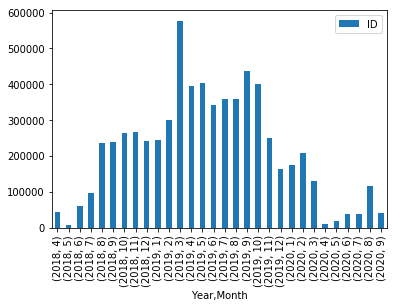

In [8]:
clean_data[['ID', 'Month', 'Year']].groupby(['Year', 'Month']).count().plot(kind='bar')
plt.show()

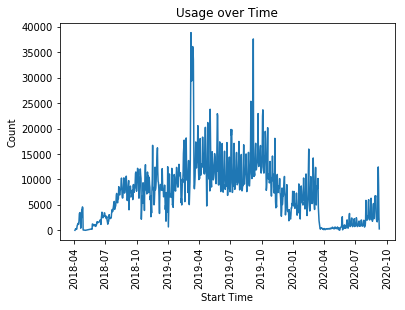

In [9]:
clean_data['Start Time'].groupby(clean_data['Start Time'].dt.date).count().plot(rot=90)
plt.title('Usage over Time')
plt.ylabel('Count')
plt.show()

**Observation**
* There is a spike in usage during March'19

#### Popular Usage Times

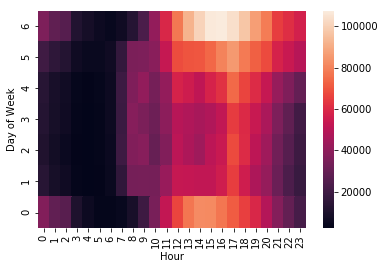

In [10]:
sns.heatmap(clean_data[['ID', 'Day of Week', 'Hour']].pivot_table(index='Day of Week', columns='Hour', values='ID', aggfunc='count').sort_index(ascending=False))

**Observation**
* Lots of riding during Saturday
* Generally higher usage in the evening - assuming after work rush

#### Group by Year, Month

In [11]:
year_month_groups=clean_data[['Trip Duration', 'Month', 'Year', 'Trip Distance']].groupby(['Year', 'Month'])

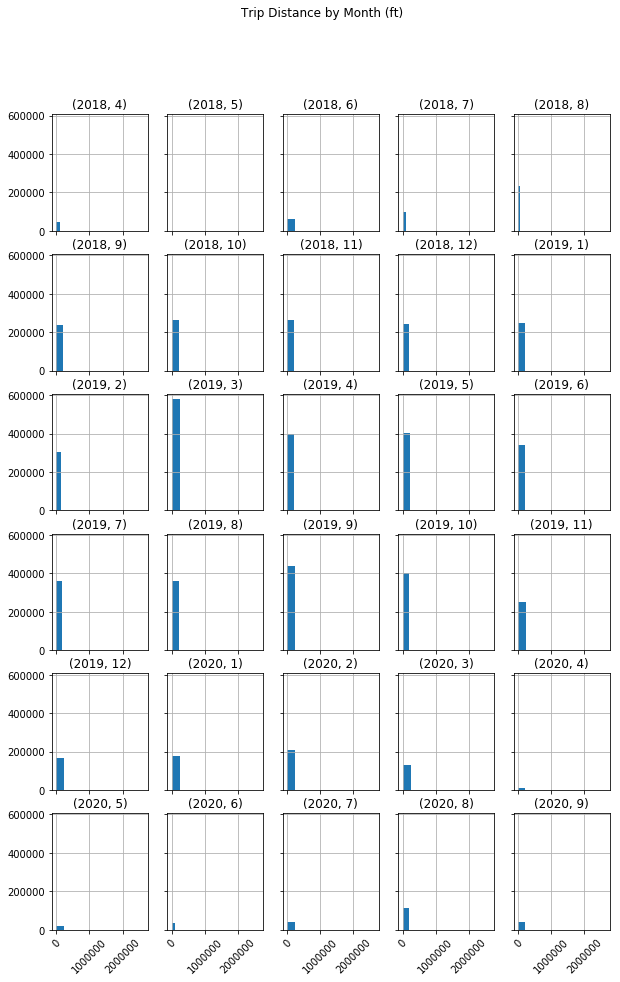

In [12]:
cols=5
rows=-(-len(year_month_groups)//cols)
fig, ax=plt.subplots(rows, cols, figsize=(10, 15), sharey=True, sharex=True)
for index, (group, each_group) in enumerate(year_month_groups['Trip Distance']): 
    each_group.hist(ax=ax[int(index/cols)][index%cols], xrot=45)
    ax[int(index/cols)][index%cols].set_title(group)
fig.suptitle('Trip Distance by Month (ft)')
plt.show()

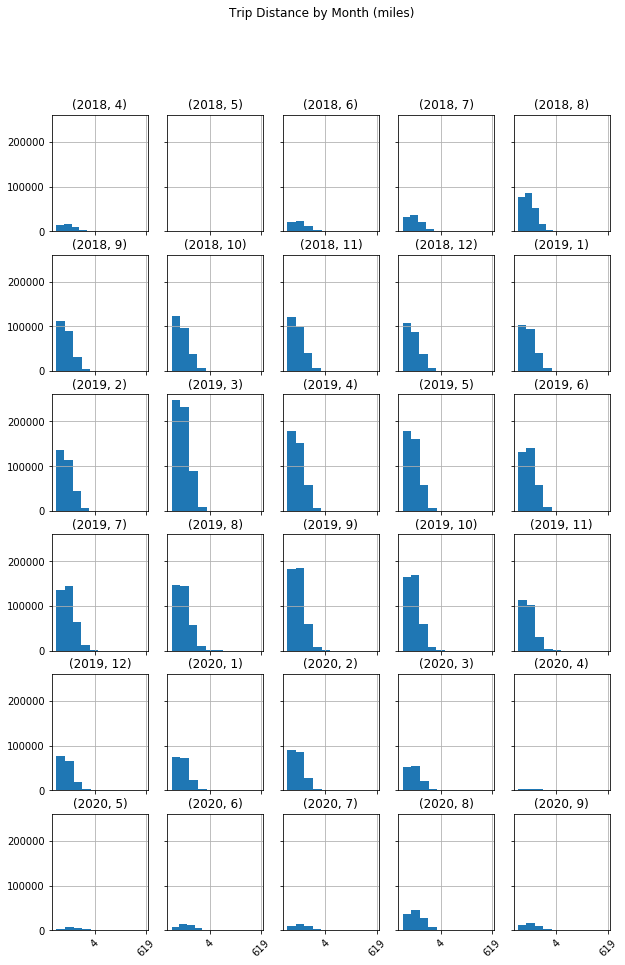

In [13]:
cols=5
rows=-(-len(year_month_groups)//cols)
fig, ax=plt.subplots(rows, cols, figsize=(10, 15), sharey=True, sharex=True)
for index, (group, each_group) in enumerate(year_month_groups['Trip Distance']): 
    np.log(each_group).hist(ax=ax[int(index/cols)][index%cols], xrot=45)
    ax[int(index/cols)][index%cols].set_title(group)
fig.suptitle('Trip Distance by Month (miles)')
plt.xticks([10, 15], [int(np.exp(10)/5280), int(np.exp(15)/5280)])
plt.show()

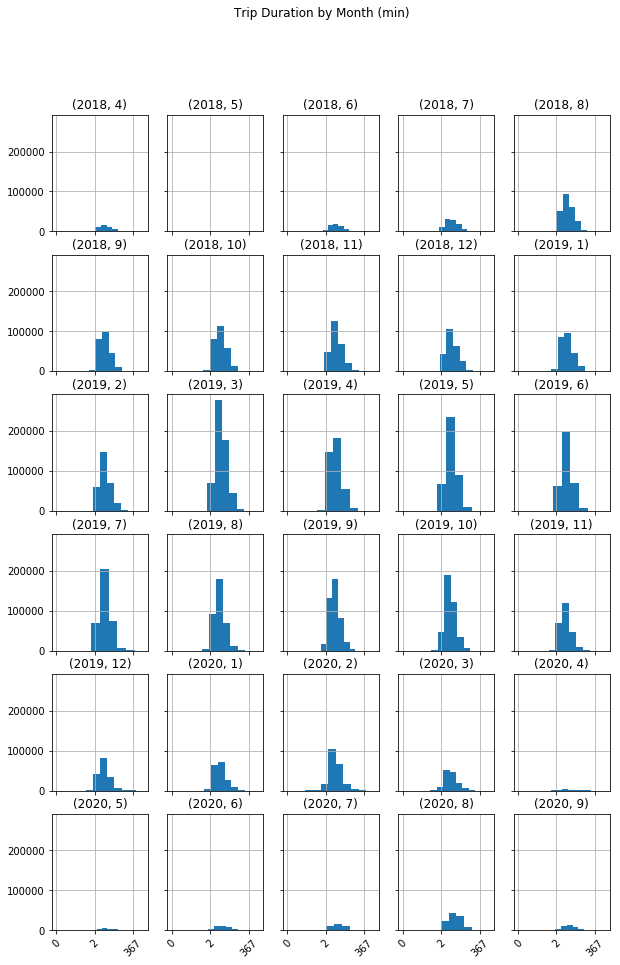

In [14]:
cols=5
rows=-(-len(year_month_groups)//cols)
fig, ax=plt.subplots(rows, cols, figsize=(10, 15), sharey=True, sharex=True)
for index, (group, each_group) in enumerate(year_month_groups['Trip Duration']): 
    np.log(each_group.clip(lower=1)).hist(ax=ax[int(index/cols)][index%cols], xrot=45)
    ax[int(index/cols)][index%cols].set_title(group)
fig.suptitle('Trip Duration by Month (min)')
plt.xticks([0, 5, 10], [int(np.exp(0)/60), int(np.exp(5)/60), int(np.exp(10)/60)])
plt.show()

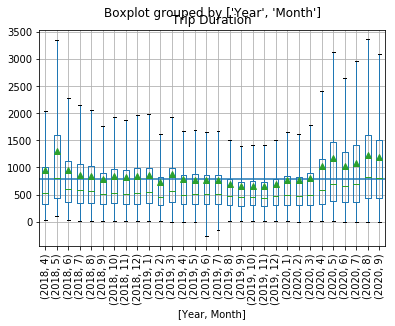

In [15]:
clean_data[['Trip Duration', 'Month', 'Year']].boxplot(by=['Year', 'Month'], showfliers=False, rot=90, showmeans=True)
plt.axhline(clean_data['Trip Duration'].mean())
plt.show()

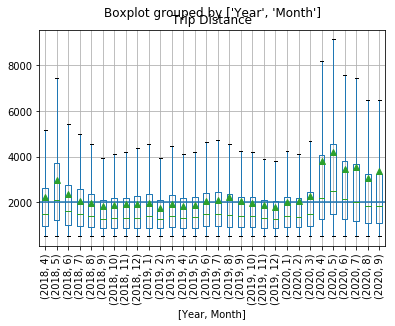

In [16]:
clean_data[['Trip Distance', 'Month', 'Year']].boxplot(by=['Year', 'Month'], showfliers=False, rot=90, showmeans=True)
plt.axhline(clean_data['Trip Distance'].mean())
plt.show()

#### User Data

In [17]:
print(f'On Average, Users: \n\
    Travel {clean_data["Trip Distance"].mean()/5280} Miles \n\
    Over {clean_data["Trip Duration"].mean()/60} Mins \n\
    At a Velocity of {clean_data["Trip Distance"].mean()/5280/(clean_data["Trip Duration"].mean()/3600)} MPH')

On Average, Users: 
    Travel 0.38353910918287115 Miles 
    Over 13.146640402162273 Mins 
    At a Velocity of 1.7504355369138527 MPH


#### Scooter Data

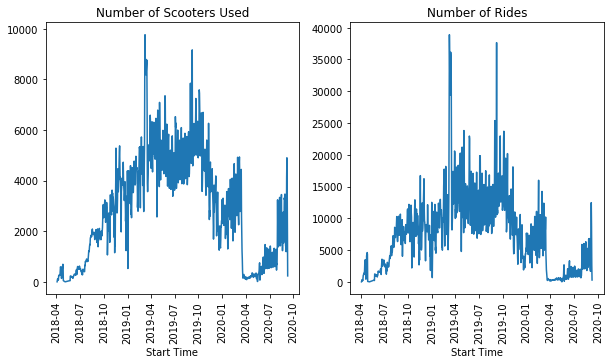

In [18]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
clean_data[['Device ID', 'Start Time']].groupby(clean_data['Start Time'].dt.date)['Device ID'].nunique().plot(rot=90, ax=ax[0])
clean_data['Start Time'].groupby(clean_data['Start Time'].dt.date).count().plot(rot=90, ax=ax[1])
ax[0].set_title('Number of Scooters Used')
ax[1].set_title('Number of Rides')
plt.show()

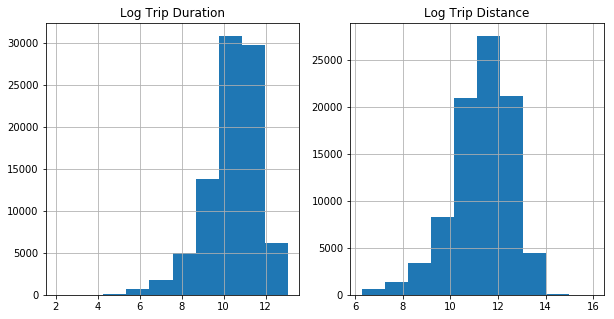

In [19]:
device_group=clean_data[['Device ID', 'Trip Duration', 'Trip Distance']].groupby('Device ID').sum()
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
np.log(device_group['Trip Duration']).hist(ax=ax[0])
np.log(device_group['Trip Distance']).hist(ax=ax[1])
ax[0].set_title('Log Trip Duration')
ax[1].set_title('Log Trip Distance')
plt.show()

**Observation**
* A distribution of usage suggests that scooters are not being evenly deployed. This could lead to faster wear and tear

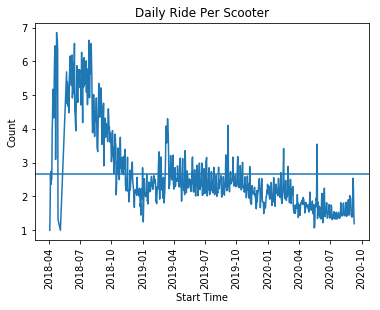

In [20]:
daily_rides=clean_data['Start Time'].groupby(clean_data['Start Time'].dt.date).count()
daily_active_scooters=clean_data[['Device ID', 'Start Time']].groupby(clean_data['Start Time'].dt.date)['Device ID'].nunique()
(daily_rides/daily_active_scooters).plot(rot=90)
plt.axhline((daily_rides/daily_active_scooters).mean())
plt.title('Daily Ride Per Scooter')
plt.ylabel('Count')
plt.show()

### Final Remarks

**Observations**
* Daily Ride Per Scooter appears to be decreasing over time - this should be a bench mark against competitors in the pursuit of optimization
* We want to have low active scooter (decrease maintenance cost) and high usage (increase revenue)
* Usage decreaes significantly during the winter month - seasonality effect

**More**
* Would compliment with weather data to find correlation
* Would require user identification to identify power users' behavior

In [21]:
clean_data.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Velocity
0,1d4f113d-71b2-4213-9170-1644e048d4a1,d4d91f54-5527-4bef-9ce8-24808fbfadc3,scooter,420,869.00,2018-04-10 20:00:00,2018-04-10 20:00:00,04/17/2019 01:58:49 AM,4,20,2,9,9,2018,48453001100,48453001100,2.07
1,05d3d08f-9960-48e3-82f6-79a375ee28b0,4f62c903-e21b-499f-9197-fd0498f25cc5,scooter,371,1037.00,2018-04-10 19:45:00,2018-04-10 20:00:00,04/17/2019 01:58:49 AM,4,19,2,9,9,2018,48453000603,48453000601,2.80
2,61a4992e-7dff-4142-8dd6-baa23acf561a,6a25bdcf-1f68-4778-95b4-4223c7beec15,scooter,1687,4491.00,2018-04-23 13:15:00,2018-04-23 13:45:00,04/17/2019 02:42:15 AM,4,13,1,9,9,2018,48453001100,48453001100,2.66
3,f1410b76-327b-479c-825e-45168034f390,b6efa85b-a836-4412-9620-77609f0e612b,scooter,524,633.00,2018-04-27 21:45:00,2018-04-27 22:00:00,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000603,48453000604,1.21
4,61250373-bece-46c2-a7c6-fb91c53eeefe,7af82887-fe34-4327-a63a-dfd11646252f,scooter,322,1114.00,2018-04-27 21:45:00,2018-04-27 21:45:00,04/17/2019 02:42:15 AM,4,21,5,9,9,2018,48453000500,48453000601,3.46


In [27]:
clean_data['Velocity'].sort_values()

6022799   -257.43
6022828    -71.44
6009487    -58.31
6022782    -48.25
6022758    -38.52
            ...  
4597762       inf
4597763       inf
4597765       inf
4597895       inf
4594936       inf
Name: Velocity, Length: 6466776, dtype: float64

In [31]:
# clean_data.loc[4594936]['Velocity']==np.inf

inf

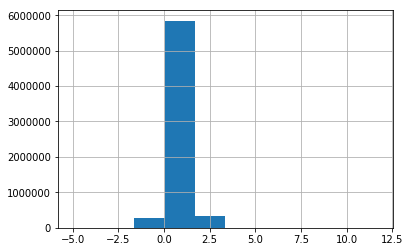

In [37]:
np.log(clean_data[clean_data['Velocity']!=np.inf]['Velocity']).hist()

In [63]:
clean_data['Census Tract Start']=clean_data['Census Tract Start'].astype('str')

In [69]:
clean_data['Census Tract Start'].value_counts()

48453001100      2488116
48453000601       515299
48453000603       431628
48453001305       431468
48453000902       376838
                  ...   
48453001839.0          1
48453001766            1
48453002421.0          1
48209010906            1
48491020313            1
Name: Census Tract Start, Length: 389, dtype: int64

In [67]:
clean_data[clean_data['Census Tract Start']=='48453001100']

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Velocity
0,1d4f113d-71b2-4213-9170-1644e048d4a1,d4d91f54-5527-4bef-9ce8-24808fbfadc3,scooter,420,869.00,2018-04-10 20:00:00,2018-04-10 20:00:00,04/17/2019 01:58:49 AM,4,20,2,9,9,2018,48453001100,48453001100,2.07
2,61a4992e-7dff-4142-8dd6-baa23acf561a,6a25bdcf-1f68-4778-95b4-4223c7beec15,scooter,1687,4491.00,2018-04-23 13:15:00,2018-04-23 13:45:00,04/17/2019 02:42:15 AM,4,13,1,9,9,2018,48453001100,48453001100,2.66
21,31a2e89c-a1e3-4e79-a898-e7b53fe9d463,d2ddd65a-908b-49c8-9829-52ad950c92ae,scooter,420,1132.00,2018-04-14 15:15:00,2018-04-14 15:15:00,04/17/2019 02:42:15 AM,4,15,6,9,9,2018,48453001100,48453001100,2.70
25,07d13395-6f8b-45ca-ac2a-6757822da241,dbcb409e-f2ff-48a7-94d8-adacf929b01e,scooter,1294,3660.00,2018-04-10 13:00:00,2018-04-10 13:15:00,04/17/2019 02:42:15 AM,4,13,2,9,9,2018,48453001100,48453001100,2.83
27,df94a0bc-bfb5-4d50-920d-38c6d0bdb0b2,3ab8b8c5-4ed0-40d0-8d8b-ce0408048b5d,scooter,2571,4951.00,2018-04-14 13:00:00,2018-04-14 13:45:00,04/17/2019 01:58:49 AM,4,13,6,9,9,2018,48453001100,48453001401,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403544,f4236ce0-b5b8-44d9-aef0-07eddfbe1dd1,36e29b37-7272-4080-8473-2a99c86db431,scooter,892,5685.00,2020-09-06 00:45:00,2020-09-06 01:00:00,09/07/2020 02:16:15 AM,9,1,6,1,9,2020,48453001100,48453000604,6.37
9403545,2819049e-9aa4-438d-ac7c-e56df800262d,f35218e1-5719-4139-9df9-766234066b4c,scooter,360,1206.00,2020-09-06 00:45:00,2020-09-06 01:00:00,09/07/2020 02:16:16 AM,9,1,6,9,9,2020,48453001100,48453001200,3.35
9403546,87bc1ef3-897d-4044-aa02-60c83442da85,a500a1dd-9f80-4eb6-90d0-41575ed5e4ae,scooter,1027,2953.00,2020-09-06 00:45:00,2020-09-06 01:00:00,09/07/2020 02:16:17 AM,9,1,6,9,9,2020,48453001100,48453001100,2.88
9403549,a4ed2010-8a40-4a90-8288-b3e8b89bdcce,4b4c7d3a-6d58-4c18-bf84-3f1ab8fe15f5,scooter,2234,2877.00,2020-09-06 00:15:00,2020-09-06 01:00:00,09/07/2020 03:15:45 AM,9,1,6,9,9,2020,48453001100,48453001605,1.29
